<a href="https://colab.research.google.com/github/widjohn/for_my_project/blob/master/Copie_de_projects6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unsupervised Learning project

It's a data science project based on unsupervised learning,i found this dataset on kaggle web site.this is a dataset on customer segmentation for a mall,and the manager of the mall wants to get information on several customer segmentation to know which group of customers are more important to start start marketing strategy.

In this project,i will select the machine learning algorithm k-means, by using the ELBOW METHOD.


Importing all relevant libraries for building unsupervised machine learning problem

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#loading dataset 
data=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
#the description of the  dataset
data.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


This dataset contains five columns,customerID,Gender,Age,Annual income and spending score.

In [ ]:
#let's make a copy of the original dataset
clusters_copy= data.copy()

Data Preparation.

Data preparation is the process of
transforming raw data into a form that is more appropriate for modeling. It may be the most
important, most time consuming, and yet least discussed area of a predictive modeling machine
learning project. Data preparation is relatively straightforward in principle, although there
is a suite of high-level classes of techniques, each with a range of dierent algorithms, and
each appropriate for a specic situation with their own hyperparameters, tips, and tricks.

In [ ]:
#let's see if there are any missing values in the dataset
clusters_copy.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#type of data
clusters_copy.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Our dataset contains five columns, four columns of type int64,and one column of type object

As we can see, it seems that there are not any missing values in the dataset.

In [ ]:
#check out duplicated values
clusters_copy.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

There are not any duplicated values in the dataset.

In [ ]:
#let's see how is the correlation between the columns
correlations= clusters_copy.corr()
correlations

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


when i checked the correlation between the features, i get an insight that there are not so many correlations between the features.The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the annual income value.
When the coefficient is close to –1, it means
that there is a strong negative correlation,as we can see a small negative correlation
between several columns.

In [ ]:
#The describe() method shows a summary of the numerical attributes
clusters_copy.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


when I run the describe method,i get an insight that the std
row shows the standard deviation (which measures how dispersed the values are).
The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indi
cates the value below which a given percentage of observations in a group of observa‐
tions falls.

Data Visualization

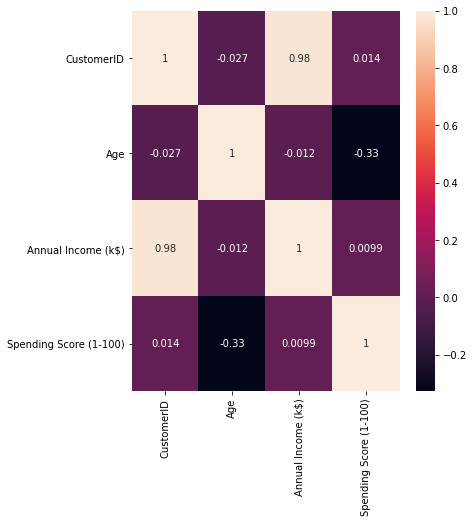

In [ ]:
#matrix of correlation
f, ax= plt.subplots(figsize=(6,7))
sns.heatmap(correlations, annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


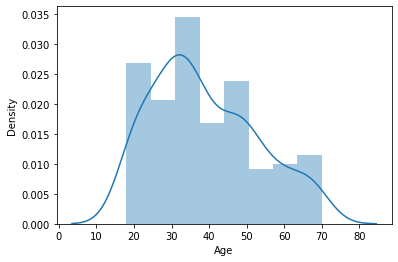

In [ ]:
#let's see how the distribution of the attribute age looks like
sns.distplot(clusters_copy.Age);

In [ ]:
#let's print the coef of pearson
from scipy import stats
stats.skew(clusters_copy.Age)

0.48191947090957177

After looking into the attribute age in our dataset, i get an insight that there is a normal distribution.

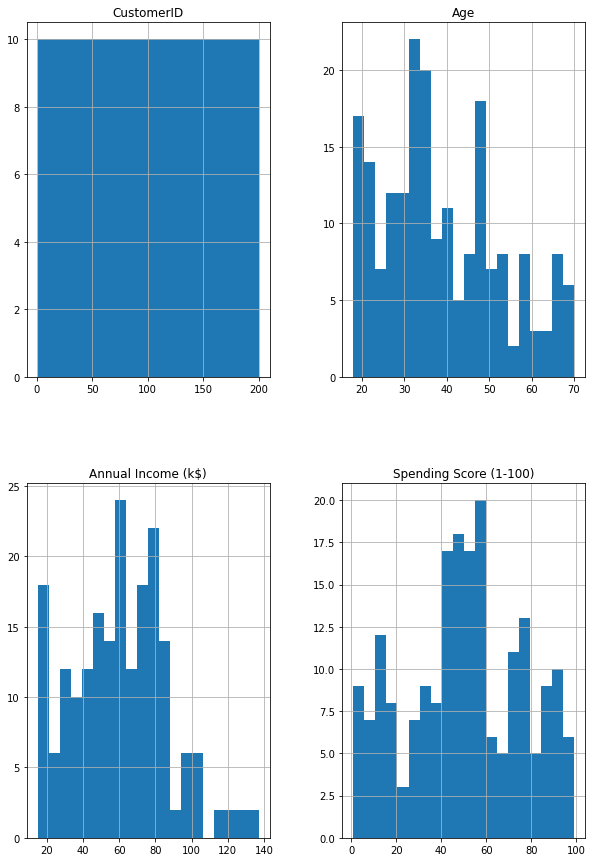

In [ ]:
#histogram
clusters_copy.hist(bins=20, figsize=(10,15))
plt.show()

After looking into the attribute age in our dataset, i get an insight that there is a normal distribution


Resume of EDA of our dataset:

 *This dataset contains five columns,customerID,Gender,Age,Annual income and spending score.

*There are not any missing values in the dataset.

*There are not any duplicated values in the dataset.

*when i checked the correlation between the features, i get an insight that there are not so many correlations between the features.

*when I run the describe method,i get an insight that the std row shows the standard deviation (which measures how dispersed the values are). The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indi cates the value below which a given percentage of observations in a group of observa‐ tions falls.

*Our dataset contains five columns, four columns of type int64,and one column of type object

In [ ]:
#Let's remove unnecessaries variable
x_feature=clusters_copy.iloc[:, [3, 4]].values

In [ ]:
#using kmeans for clustering
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 10 ):
    kmeans_clusters= KMeans(n_clusters= i, init= 'k-means++', random_state= 42)
    kmeans_clusters.fit(x_feature)
    wcss.append(kmeans_clusters.inertia_)

In this project I select the machine learning algorithm k-means ,because i develop an unsupervised machine learning project,in practice ,the k-means algorithm is one of  the fastest clustering algorithms available.

*The Elbow method

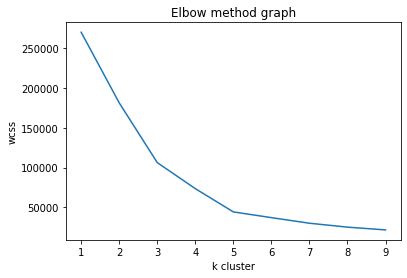

In [ ]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow method graph')
plt.xlabel('k cluster')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans_clusters= KMeans(n_clusters= 5, init= 'k-means++', random_state= 42)
y_pred=kmeans_clusters.fit_predict(x_feature)

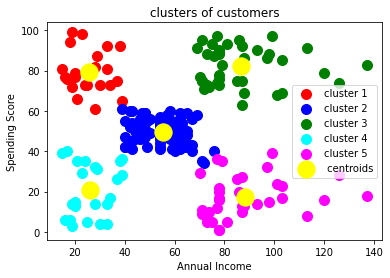

In [ ]:
plt.scatter(x_feature[y_pred== 0,0], x_feature[y_pred==0, 1], s= 100, c= 'red', label= 'cluster 1')
plt.scatter(x_feature[y_pred== 1,0], x_feature[y_pred==1, 1], s= 100, c= 'blue', label= 'cluster 2')
plt.scatter(x_feature[y_pred== 2,0], x_feature[y_pred==2, 1], s= 100, c= 'green', label= 'cluster 3')
plt.scatter(x_feature[y_pred== 3,0], x_feature[y_pred==3, 1], s= 100, c= 'cyan', label= 'cluster 4')
plt.scatter(x_feature[y_pred== 4,0], x_feature[y_pred==4, 1], s= 100, c= 'magenta', label= 'cluster 5')

plt.scatter(kmeans_clusters.cluster_centers_[:, 0], kmeans_clusters.cluster_centers_[:,1], s= 300, c='yellow', label=' centroids')
plt.title('clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

**Conclusion
This part is the conclusion of project.I developed several part of a data science project life cycle. Once I defined the business problem,i get the data, i refined it for the use in performing exploratory data and visualizations.
Ultimately,i selected the unsupervised machine learning algorithm K-means that me allowed to cluster the customers in five clusters ,by identifying which customer segmentation has more spending score , much more annual income.

And ultimately, i discoved the cluster five has much more annual income and has less spending score.